In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
from IPython.display import clear_output
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
files = ['Consumable', 'Non-Consumable']
address = 'D:/VIT/Meat-Quality-Assessment-and-Classification/Dataset/Fish/'

In [5]:
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(address+col)
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

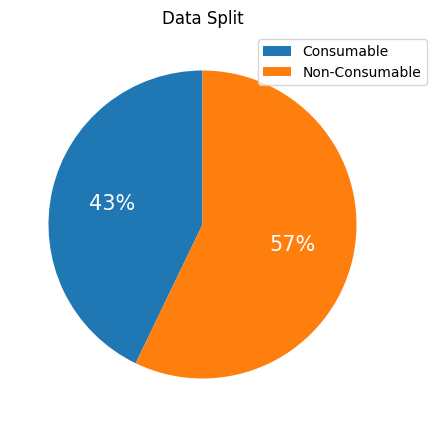

In [6]:
sizes = [len(data['Consumable']), len(data['Non-Consumable'])]
plt.figure(figsize=(10,5), dpi=100)
plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90)
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [7]:
width = 100
height = 100

In [8]:
start = time.time()
image_data = []
image_target = []
for title in files:
    os.chdir(address+title)
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
    clear_output(wait=True)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Calculate Time 34.44304


In [9]:
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(140, 100, 100, 3)

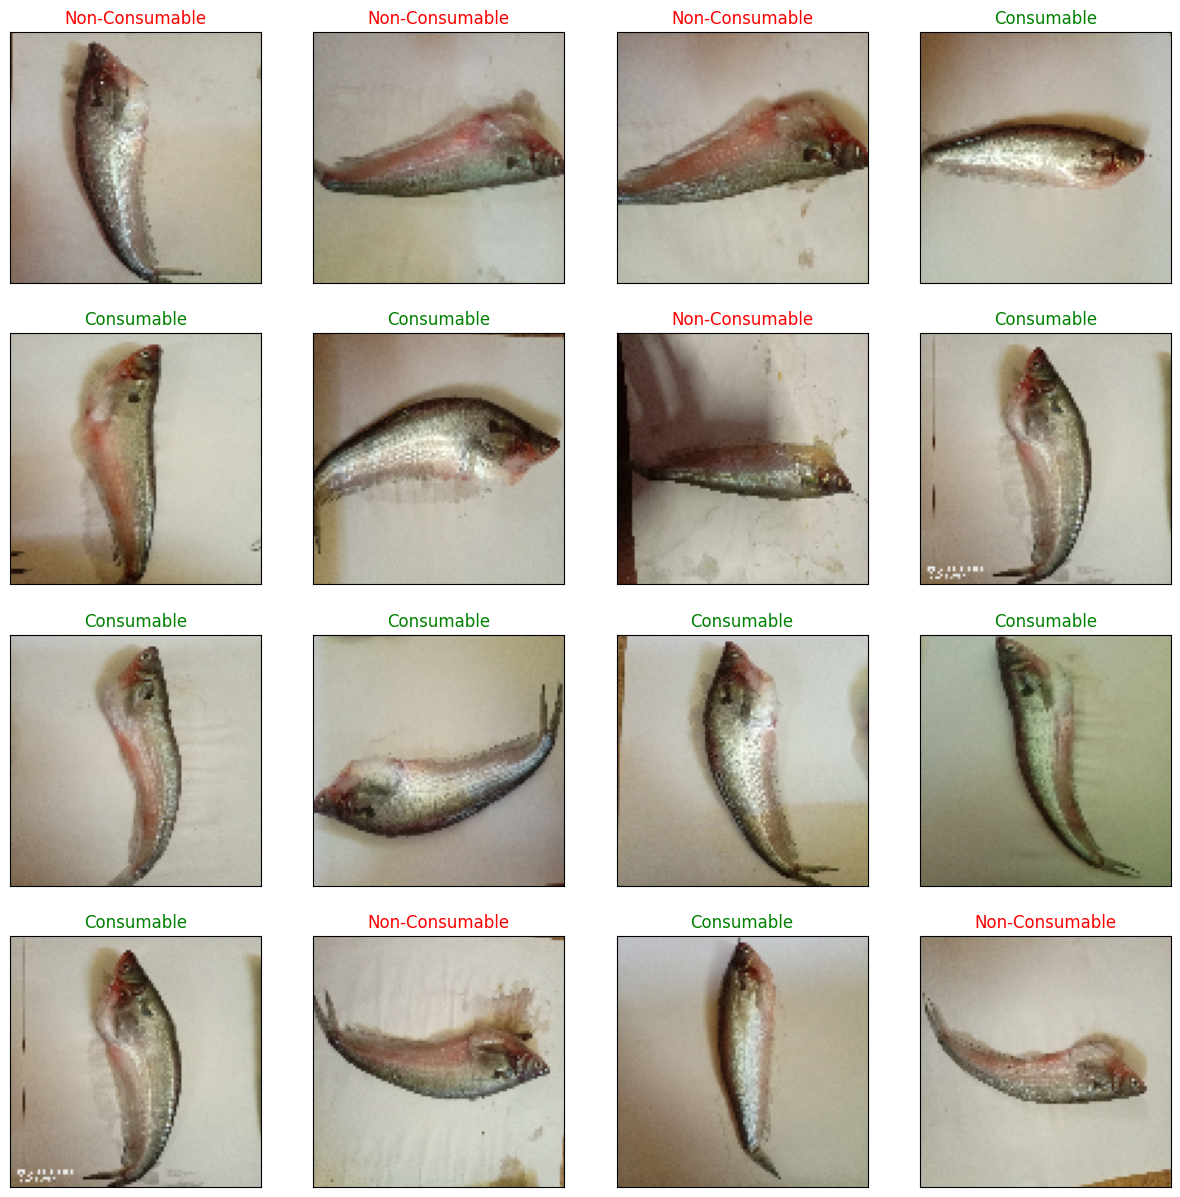

In [10]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Consumable':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [11]:
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [12]:
X = image_data / 255.0
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [13]:
from tensorflow.keras.applications import DenseNet121
model = models.Sequential()
model.add(DenseNet121(include_top=False, pooling='avg', input_shape=(width,height,3)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.5051 - loss: 1.0475 - val_accuracy: 0.5000 - val_loss: 0.8328
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6551 - loss: 0.6395 - val_accuracy: 0.4762 - val_loss: 1.3659
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 990ms/step - accuracy: 0.6788 - loss: 0.6076 - val_accuracy: 0.4762 - val_loss: 1.7831
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7644 - loss: 0.5639 - val_accuracy: 0.4762 - val_loss: 4.1016
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8667 - loss: 0.3226 - val_accuracy: 0.4762 - val_loss: 5.4251
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8574 - loss: 0.3620 - val_accuracy: 0.4762 - val_loss: 3.5240
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8885 - loss: 0.3143 - val_accuracy: 0.4762 - val_loss: 3.3284
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 985ms/step - accuracy: 0.9433 - loss: 0.1837 - val_accuracy: 0.4524 - val_loss: 2.3502
Epoch 9/1

2/2 - 1s - 390ms/step - accuracy: 0.6429 - loss: 1.2395


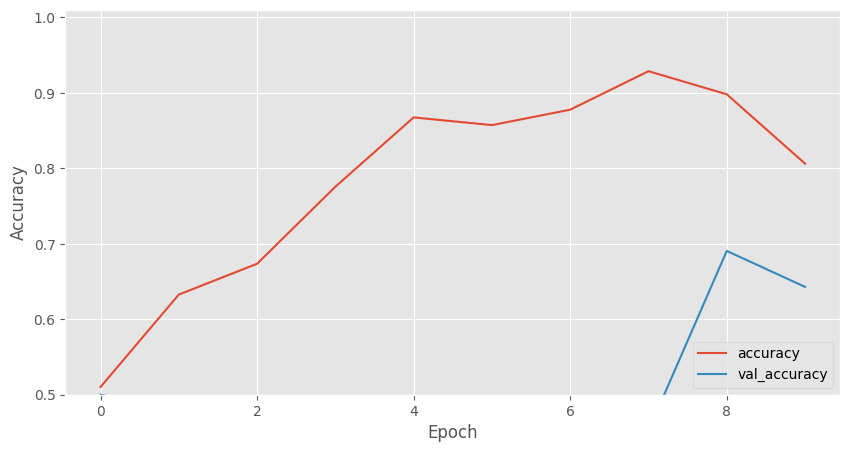

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [15]:
result=model.evaluate(test_images, test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.6577 - loss: 1.1724


In [16]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 1.2395352125167847
compile_metrics : 0.6428571343421936


2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step


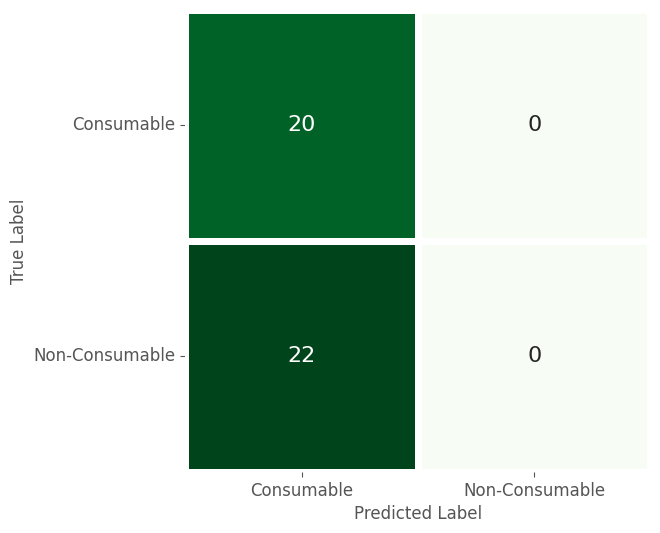

In [17]:
y_pred = model.predict(test_images)
def toClass(pred):
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
    return class_
cm = confusion_matrix(test_labels,toClass(y_pred))
df1 = pd.DataFrame(columns=["Consumable","Non-Consumable"], index= ["Consumable","Non-Consumable"], data= cm )
f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.show()

In [19]:
files = ['Consumable', 'Non-Consumable']
address = 'D:/VIT/Meat-Quality-Assessment-and-Classification/Dataset/Fish/'

In [20]:
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(address+col)
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

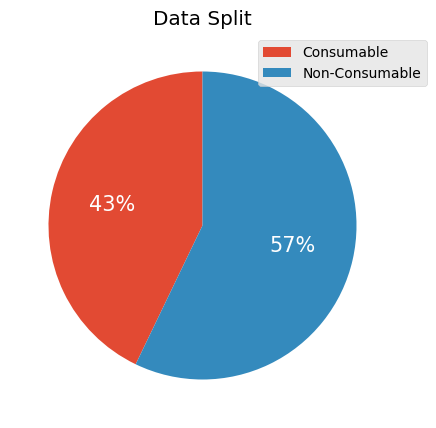

In [21]:
sizes = [len(data['Consumable']), len(data['Non-Consumable'])]
plt.figure(figsize=(10,5), dpi=100)
plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90)
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [22]:
width = 100
height = 100

In [24]:
start = time.time()
image_data = []
image_target = []
for title in files:
    os.chdir(address+title)
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
    clear_output(wait=True)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Calculate Time 57.98199


In [25]:
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(140, 100, 100, 3)

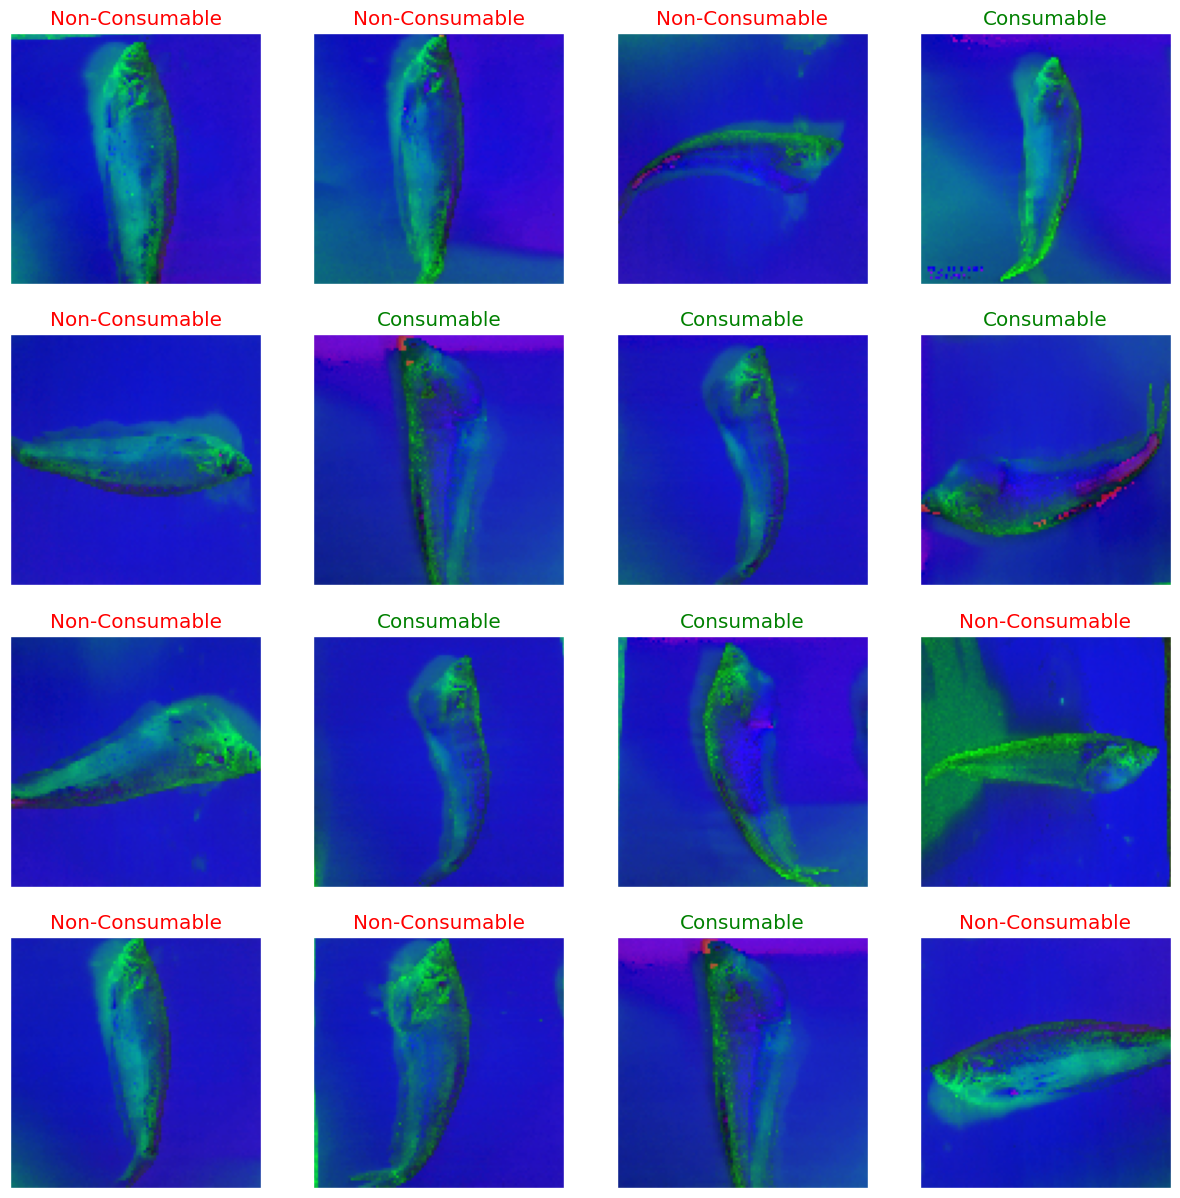

In [26]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Consumable':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [27]:
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [28]:
X = image_data / 360.0
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [29]:
from tensorflow.keras.applications import DenseNet121
model = models.Sequential()
model.add(DenseNet121(include_top=False, pooling='avg', input_shape=(width,height,3)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.4680 - loss: 1.2612 - val_accuracy: 0.5476 - val_loss: 1.0108
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6301 - loss: 0.6766 - val_accuracy: 0.4286 - val_loss: 0.9136
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6623 - loss: 0.5747 - val_accuracy: 0.5238 - val_loss: 1.5257
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6237 - loss: 0.7139 - val_accuracy: 0.5238 - val_loss: 1.7464
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7602 - loss: 0.5063 - val_accuracy: 0.5000 - val_loss: 1.3258
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8161 - loss: 0.3969 - val_accuracy: 0.4762 - val_loss: 3.0757
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8264 - loss: 0.4920 - val_accuracy: 0.4762 - val_loss: 2.8907
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8916 - loss: 0.2694 - val_accuracy: 0.4762 - val_loss: 5.2766
Epoch 9/10
4/4 

2/2 - 1s - 286ms/step - accuracy: 0.4762 - loss: 13.0585


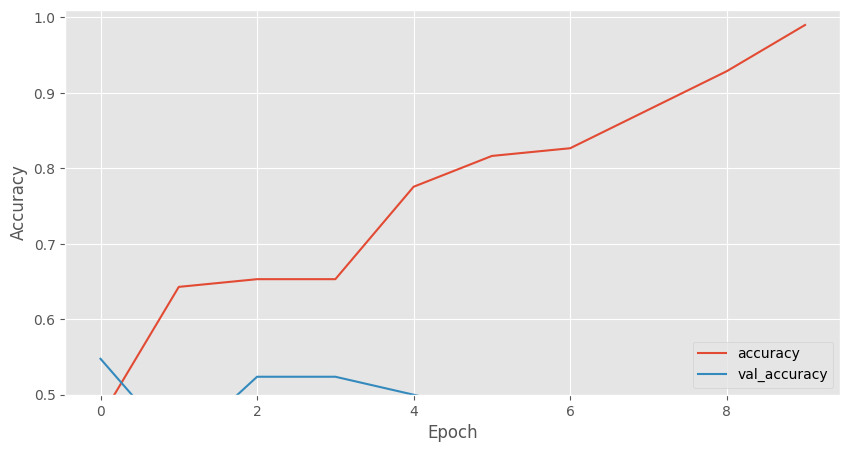

In [30]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [31]:
result=model.evaluate(test_images, test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.4945 - loss: 12.5193


In [32]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 13.058496475219727
compile_metrics : 0.4761904776096344


2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step


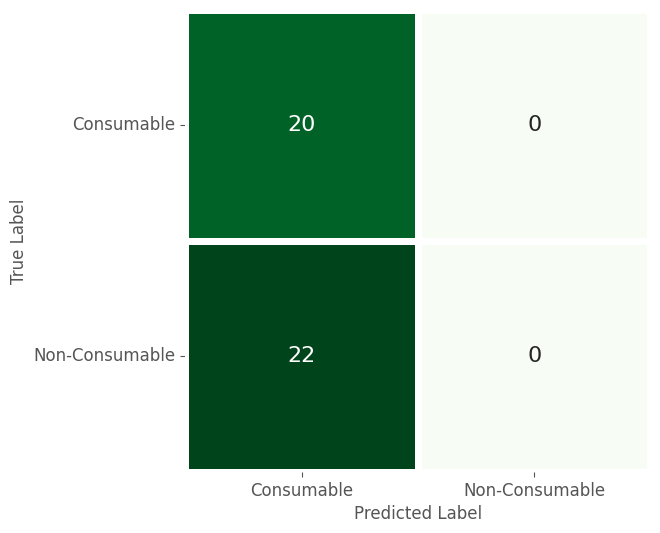

In [33]:
y_pred = model.predict(test_images)
def toClass(pred):
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
    return class_
cm = confusion_matrix(test_labels,toClass(y_pred))
df1 = pd.DataFrame(columns=["Consumable","Non-Consumable"], index= ["Consumable","Non-Consumable"], data= cm )
f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.show()